In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from find_params import load_depth_relation
import numpy as np

In [2]:
df = pd.read_csv('results.csv')
df.head()

,No,Grit,Pmax (mN),hmax (um),Hv,Hit (GPa),Er (GPa),Eit (GPa),S (N/mm),Ap (um^2),hc (um)
0,1,80,1003.444234,4.034465,355.218976,3.758931,55.658275,53.235409,1025.916136,266.949365,3.300893
1,2,80,1003.294586,4.487009,243.349164,2.575123,67.688430,65.464428,1507.291753,389.610290,3.987789
2,3,80,1003.223941,3.633060,369.340055,3.908360,105.058779,105.256019,1898.898143,256.686653,3.236820
3,4,80,1003.190070,3.269315,460.068904,4.868454,125.835262,128.640030,2037.821356,206.059268,2.900100
4,5,80,1003.162885,3.336274,448.654436,4.747666,114.827077,116.132863,1883.031709,211.296011,2.936720


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         62 non-null     int64  
 1   Grit       62 non-null     int64  
 2   Pmax (mN)  62 non-null     float64
 3   hmax (um)  62 non-null     float64
 4   Hv         62 non-null     float64
 5   Hit (GPa)  62 non-null     float64
 6   Er (GPa)   62 non-null     float64
 7   Eit (GPa)  62 non-null     float64
 8   S (N/mm)   62 non-null     float64
 9   Ap (um^2)  62 non-null     float64
 10  hc (um)    62 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 5.5 KB


In [4]:
df = df.set_index('No', drop=True)
df.head()

,Grit,Pmax (mN),hmax (um),Hv,Hit (GPa),Er (GPa),Eit (GPa),S (N/mm),Ap (um^2),hc (um)
No,,,,,,,,,,
1,80,1003.444234,4.034465,355.218976,3.758931,55.658275,53.235409,1025.916136,266.949365,3.300893
2,80,1003.294586,4.487009,243.349164,2.575123,67.688430,65.464428,1507.291753,389.610290,3.987789
3,80,1003.223941,3.633060,369.340055,3.908360,105.058779,105.256019,1898.898143,256.686653,3.236820
4,80,1003.190070,3.269315,460.068904,4.868454,125.835262,128.640030,2037.821356,206.059268,2.900100
5,80,1003.162885,3.336274,448.654436,4.747666,114.827077,116.132863,1883.031709,211.296011,2.936720


In [5]:
df.columns = ['Grit', 'Pmax', 'hmax', 'Hv', 'Hit', 'Er', 'Eit', 'S', 'Ap', 'hc']
df.head()

,Grit,Pmax,hmax,Hv,Hit,Er,Eit,S,Ap,hc
No,,,,,,,,,,
1,80,1003.444234,4.034465,355.218976,3.758931,55.658275,53.235409,1025.916136,266.949365,3.300893
2,80,1003.294586,4.487009,243.349164,2.575123,67.688430,65.464428,1507.291753,389.610290,3.987789
3,80,1003.223941,3.633060,369.340055,3.908360,105.058779,105.256019,1898.898143,256.686653,3.236820
4,80,1003.190070,3.269315,460.068904,4.868454,125.835262,128.640030,2037.821356,206.059268,2.900100
5,80,1003.162885,3.336274,448.654436,4.747666,114.827077,116.132863,1883.031709,211.296011,2.936720


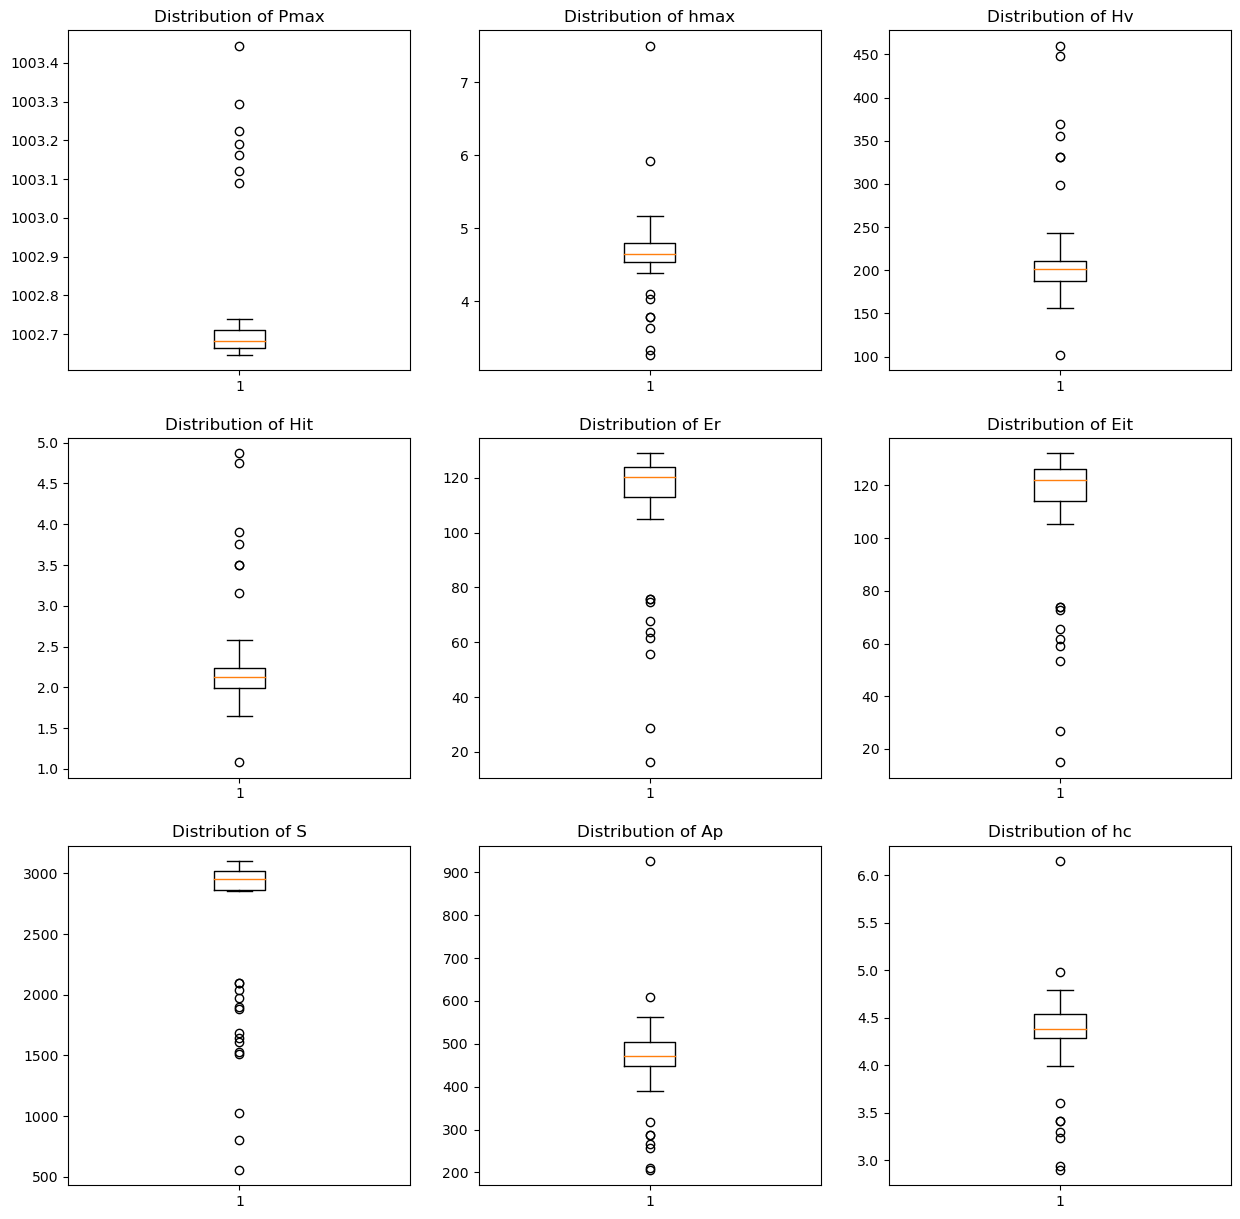

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
cols = df.columns[1::]

for i, ax in enumerate(axes):
    ax.boxplot(df[cols[i]])
    ax.set_title(f'Distribution of {cols[i]}')

plt.show()

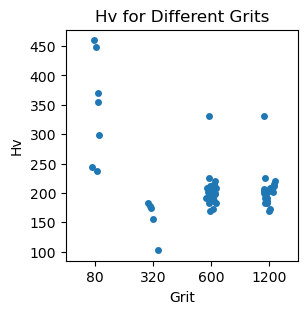

In [7]:
plt.figure(figsize=(3, 3))
sns.stripplot(data=df, x='Grit', y='Hv')
plt.title('Hv for Different Grits');

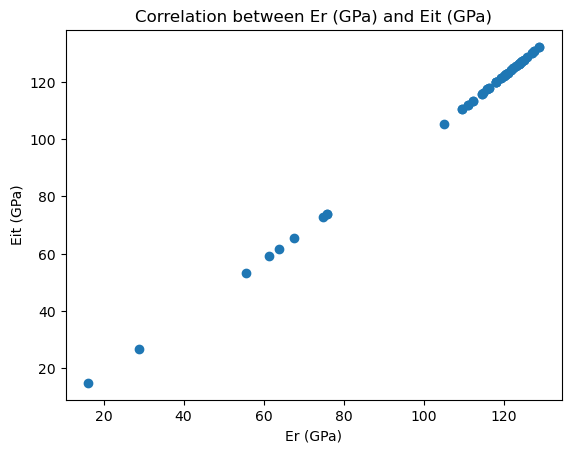

In [8]:
plt.scatter(df.Er, df.Eit)
plt.xlabel('Er (GPa)')
plt.ylabel('Eit (GPa)')
plt.title('Correlation between Er (GPa) and Eit (GPa)');

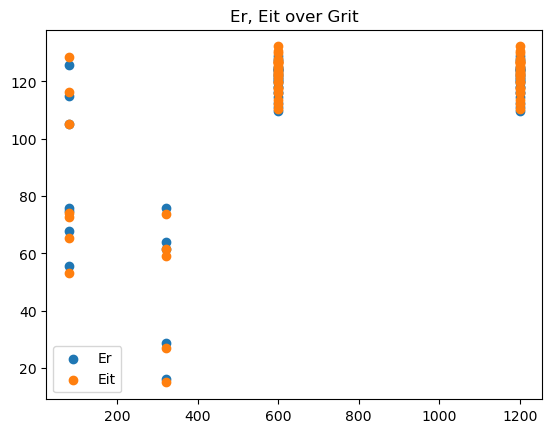

In [9]:
plt.scatter(df.Grit, df.Er, label='Er')
plt.scatter(df.Grit, df.Eit, label='Eit')
plt.title('Er, Eit over Grit')
plt.legend();

In [10]:
df_600grit = pd.read_csv('./microhardness-data/600grit/600grit_results.csv')
df_600grit = df_600grit.set_index('Test No', drop=True)
df_600grit.columns = ['Load', 'Displacement']
df_600grit.head()

,Load,Displacement
Test No,,
1,0.0,59.178125
1,0.0,59.178125
1,0.0,59.178125
1,0.0,59.178125
1,0.0,59.178125


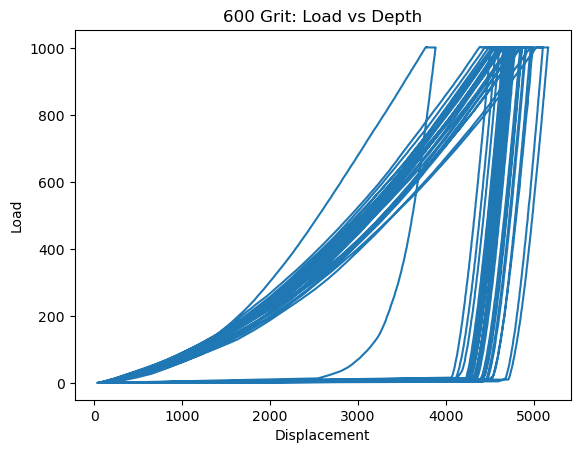

In [11]:
plt.plot(df_600grit.Displacement, df_600grit.Load)
plt.title('600 Grit: Load vs Depth')
plt.xlabel('Displacement')
plt.ylabel('Load');

In [12]:
df_1200grit = pd.read_csv('./microhardness-data/1200grit/1200grit_results.csv')
df_1200grit.columns = ['Displacement', 'Load']
df_1200grit.head(-10)

,Displacement,Load
0,0.000,0.000
1,0.000,0.000
2,0.000,0.000
3,0.000,0.000
4,0.000,0.000
...,...,...
75075,4549.066,20.418
75076,4547.405,19.423
75077,4545.689,18.424
75078,4545.226,17.413


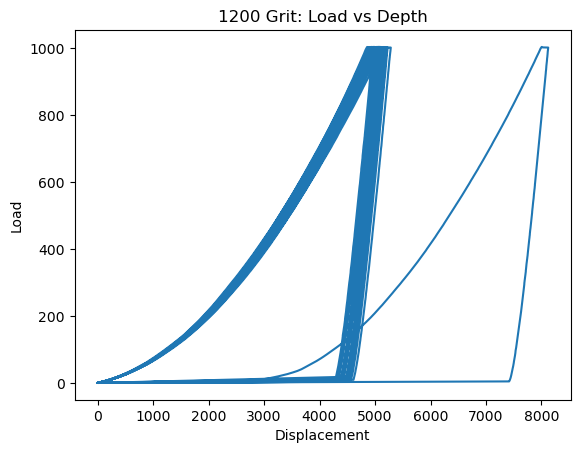

In [13]:
plt.plot(df_1200grit.Displacement, df_1200grit.Load)
plt.title('1200 Grit: Load vs Depth')
plt.xlabel('Displacement')
plt.ylabel('Load');

## p = alpha(h - h_f)^m

In [14]:
test = pd.read_csv('microhardness-data/320grit/320grit_S1test1.csv')
test.head()

,"Depth, nm - 1","Load, mN - 1",Unnamed: 2,"Time, ms - Plot 0","Load, mN - Plot 0",Unnamed: 5,"Time, ms - Plot 0.1","Depth,nm - Plot 0"
0,43.0725,0.000000,NaN,0,0.000000,NaN,0,43.0725
1,43.0725,0.000000,NaN,1,0.000000,NaN,1,43.0725
2,43.0725,0.000000,NaN,2,0.000000,NaN,2,43.0725
3,43.0725,0.000000,NaN,3,0.000000,NaN,3,43.0725
4,42.8597,0.001116,NaN,4,0.001116,NaN,4,42.8597


In [15]:
test = test.drop(labels=['Load, mN - 1', 'Unnamed: 2', 'Time, ms - Plot 0', 'Unnamed: 5', 'Depth,nm - Plot 0'], axis=1)
test.columns = ['Depth', 'Load', 'Time']
test.head()

,Depth,Load,Time
0,43.0725,0.000000,0
1,43.0725,0.000000,1
2,43.0725,0.000000,2
3,43.0725,0.000000,3
4,42.8597,0.001116,4


### before 10s

In [16]:
h_f = test.iloc[-1]['Depth']

h_0 = test.iloc[400]['Depth']
P_0 = test.iloc[400]['Load']

h_1 = test.iloc[600]['Depth']
P_1 = test.iloc[600]['Load']

print(f'h_f = {h_f}')

print(f'h_0 = {h_0}')
print(f'P_0 = {P_0}')

print(f'h_1 = {h_1}')
print(f'P_1 = {P_1}')

h_f = 5264.31
h_0 = 728.243
P_0 = 34.7829
h_1 = 1093.41
P_1 = 54.9471


In [17]:
solver = load_depth_relation(h_0, h_1, h_f, P_0, P_1)
print(f'm = {solver.solve_m()}')
print(f'alpha = {solver.solve_alpha0()}')
print(f'alpha = {solver.solve_alpha1()}')

m = -5.4480305602671635
alpha = 2.9044723007250655e+21
alpha = 2.9044723007250665e+21


### between 10-20s

In [18]:
h_f = test.iloc[-1]['Depth']

h_0 = test.iloc[11000]['Depth']
P_0 = test.iloc[11000]['Load']

h_1 = test.iloc[19000]['Depth']
P_1 = test.iloc[19000]['Load']

print(f'h_f = {h_f}')

print(f'h_0 = {h_0}')
print(f'P_0 = {P_0}')

print(f'h_1 = {h_1}')
print(f'P_1 = {P_1}')

h_f = 5264.31
h_0 = 7584.7
P_0 = 1001.1
h_1 = 7706.25
P_1 = 1001.0


In [19]:
solver = load_depth_relation(h_0, h_1, h_f, P_0, P_1)
print(f'm = {solver.solve_m()}')
print(f'alpha = {solver.solve_alpha0()}')
print(f'alpha = {solver.solve_alpha1()}')

m = -0.0019565206054101276
alpha = 1016.3943701045633
alpha = 1016.3943701045632


### find slope of the elastic region

In [82]:
df_600_isolate = df_600grit.iloc[20100:20500]
df_600_isolate

,Load,Displacement
Test No,,
1,999.272830,4915.464905
1,999.207288,4915.434287
1,999.130660,4915.586193
1,999.055176,4915.648711
1,998.985675,4915.424933
...,...,...
1,959.302047,4899.316034
1,959.199555,4899.177779
1,959.099437,4899.058037


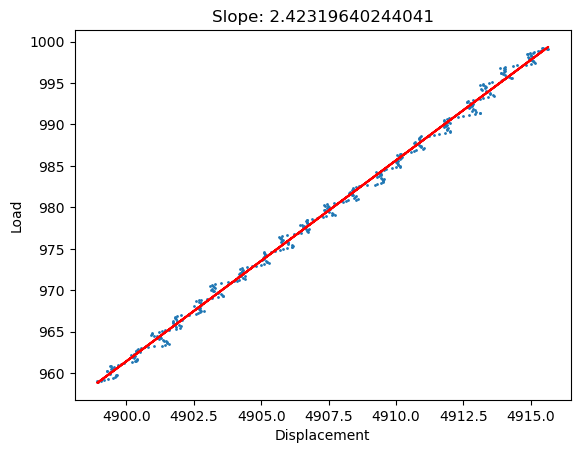

In [84]:
slope, intercept = np.polyfit(df_600_isolate.Displacement, df_600_isolate.Load, 1)
line = slope * df_600_isolate.Displacement + intercept

plt.scatter(df_600_isolate.Displacement, df_600_isolate.Load, s=1)
plt.plot(df_600_isolate.Displacement, line, color='red', label='Line of best fit')
plt.title(f'Slope: {slope}')
plt.xlabel('Displacement')
plt.ylabel('Load');

In [85]:
df_600_isolate = df_600grit[df_600grit.index==1]
df_600_isolate

,Load,Displacement
Test No,,
1,0.000000,59.178125
1,0.000000,59.178125
1,0.000000,59.178125
1,0.000000,59.178125
1,0.000000,59.178125
...,...,...
1,8.530199,4463.457622
1,8.435781,4462.972093
1,8.342204,4462.608883


### getting rid of bad data

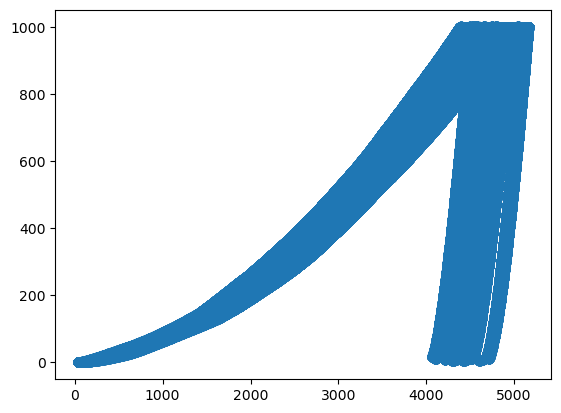

In [10]:
df = pd.read_csv('./microhardness-data/600grit/600grit_results.csv')
df = df.drop('Unnamed: 0', axis=1)

df.columns = ['Test', 'Load', 'Displacement']

df = df[df.Test!=8]
plt.scatter(df.Displacement, df.Load);
df.to_csv('./microhardness-data/600grit/600grit_results.csv', index=False)

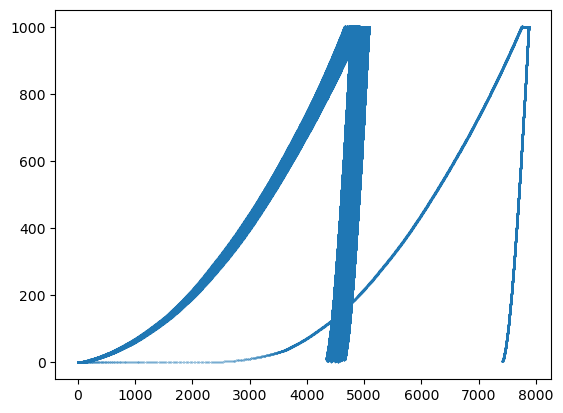

In [11]:
df = pd.read_csv('./microhardness-data/1200grit/1200grit_results.csv')
df.columns = ['Test', 'Load', 'Displacement']
plt.scatter(df.Displacement, df.Load, s=0.05);

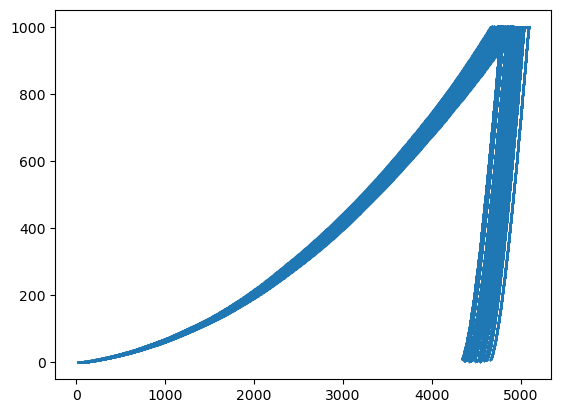

In [21]:
isolate = df[df.Test!=9]
plt.scatter(isolate.Displacement, isolate.Load, s=0.05);

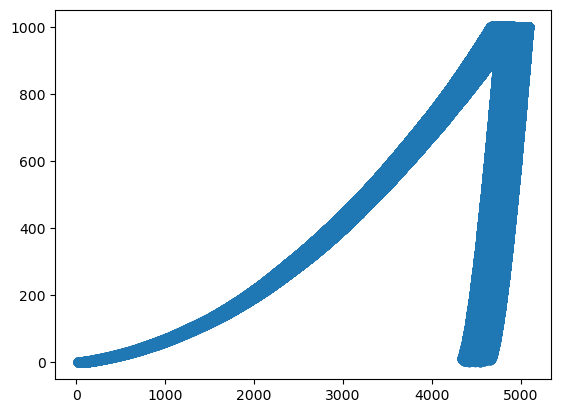

In [27]:
df = pd.read_csv('./microhardness-data/1200grit/1200grit_results.csv')
# df = df.drop('Unnamed: 0', axis=1)

df.columns = ['Test', 'Load', 'Displacement']

df = df[df.Test!=9]
plt.scatter(df.Displacement, df.Load);
df.to_csv('./microhardness-data/1200grit/1200grit_results.csv', index=False)

### 1200, 600 Grit Young's Modulus Mean

In [32]:
df = pd.read_csv('output.csv')
df_1200 = df[df.Grit==1200]
np.mean(df_1200['Young\'s Modulus'])

120467864293.02014

In [33]:
df_600 = df[df.Grit==600]
np.mean(df_600['Young\'s Modulus'])

115394392217.4897